In [1]:
def get_today_date():
    from datetime import datetime
    date_str = str(datetime.now())
    today=datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
    return today.strftime('%d-%b-%Y')

In [2]:
symbol ='BANKNIFTY'
lot = 25
# today = get_today_date()#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# today = '04-Oct-2022'
# expiry= '06-Oct-2022' #<<<<<<<<<<<<<<<<< current expiry
s=39000
c='CE'
v=0
cover= 'ALL'
res = '60T'

day = 10
month ='Oct'
year = '2022'

dayE = 13
monthE ='Oct'
yearE = '2022'

In [3]:
if day < 10 :
    val ='0'+str(day)
    today = val+"-"+month+"-"+year
else:
    today = str(day)+"-"+month+"-"+year
# today
if dayE < 10 :
    val ='0'+str(dayE)
    expiry = val+"-"+monthE+"-"+yearE
else:
    expiry = str(dayE)+"-"+monthE+"-"+yearE
# expiry

In [4]:
def get_today_date():
    from datetime import datetime
    date_str = str(datetime.now())
    today=datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
    return today.strftime('%d-%b-%Y')

# today = get_today_date()#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# expiry= '22-Sep-2022' #<<<<<<<<<<<<<<<<< current expiry
# today = '14-Sep-2022'

def get_hh_mm_time(data_df):
    data_df["timestamp"] = pd.to_datetime(data_df["timestamp"])
    data_df["timestamp"] = data_df["timestamp"].dt.strftime('%H:%M')
    return data_df

def get_path_filename(filename):
    path='D:\Jupyter Python\Stocks-office\json-csv\\'
    newFilename=path+filename
    return newFilename

def get_option_ohlc_csv(symbol):
       
        filename = symbol + '-FULL-OPTIONS-OHLC-' + today + ".csv"
        filename=get_path_filename(filename)

        df=pd.read_csv(filename,index_col=False)
        
        return df
      
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings("ignore")

# symbol ='BANKNIFTY'
# lot = 25


option_ohlc = get_option_ohlc_csv(symbol) # read csv file by option type
option_ohlc=get_hh_mm_time(option_ohlc)

option_ohlc['openInterest']=option_ohlc['openInterest']*lot/100000
option_ohlc=option_ohlc[option_ohlc["openInterest"]!=0] # for droping yesterday data in today csv

# option_ohlc["openInterest"]=round(((option_ohlc["openInterest"]*lot)/100000),1)


atm=int(option_ohlc["underlying"].iloc[-1]) # getting value of ATM strike
atm =round(atm/100)*100
max_=atm+500
min_ = atm-500

g1=option_ohlc.groupby("expiryDate")
df_expiry=g1.get_group(expiry)
g2=df_expiry.groupby("optionType")
df_CE=g2.get_group("Call")
df_PE=g2.get_group("Put")
g1_CE=df_CE.groupby("strikePrice")
g1_PE=df_PE.groupby("strikePrice")



In [5]:
def get_option_price_df(df,s,c):
    def f(df):
        if df["pchangeinOpenInterest"]>0 and df["pChange"]>0:
            val= "LB"
        elif df["pchangeinOpenInterest"]<0 and df["pChange"]<0:
            val="LW"
        elif df["pchangeinOpenInterest"]<0 and df["pChange"]>0:
            val="SC"
        elif df["pchangeinOpenInterest"]>0 and df["pChange"]<0:
            val="SB"
        else:
            val=np.nan
        return val

    def red_font_negatives(series):
        highlight = 'color: red;'#,'font-weight: bold;'
        default = 'color: green;'
        return [highlight if e < 0 else default for e in series]
    def blue_font(series):
        highlight = 'color: royalblue;'#,'font-weight: bold;'
        default = 'color: green;'
        return [highlight if e > 0 else default for e in series]
    
    def colour_numbers(series):
        red    = 'background-color: orangered;'
        orange = 'background-color: olive;' 
        blue = 'background-color: royalblue;' 
        green = 'background-color: seagreen;' 

        default = ''

        # note multiple else ..if conditions
        return [red if e == 'SB' else green if e == 'LB' else orange if e == 'LW' else blue if e == 'SC' else default for e in series] 

    cf=df.get_group(s)
    cf=cf[['timestamp', 'underlying','expiryDate', 'optionType',
           'strikePrice', 'openPrice', 'highPrice', 'lowPrice'
           , 'prevClose', 'lastPrice', 'pChange',
           'vmap', 'openInterest',
           'pchangeinOpenInterest', 'impliedVolatility',
           ]]
    cf['buildup'] = cf.apply(f, axis=1)
    cf=cf.reset_index()
    cf.drop('index',axis=1,inplace=True)
    if c=='ALL' :
        return (cf.sort_values(by='timestamp',ascending=False).style.apply(red_font_negatives, axis=0, subset=['pChange','pchangeinOpenInterest'])
        .apply(blue_font, axis=0, subset=['lastPrice'])
        .apply(colour_numbers, axis=0, subset=['buildup'])
        .format(precision=2))
    else:
        return (cf[cf["buildup"] == c ].sort_values(by='timestamp',ascending=False).style.apply(red_font_negatives, axis=0, subset=['pChange','pchangeinOpenInterest'])
        .apply(blue_font, axis=0, subset=['lastPrice'])
        .apply(colour_numbers, axis=0, subset=['buildup'])
        .format(precision=2))

# for PE change g1_ce to g1_pe
# use SC,SB,LW,LB
# s=41300
# c='CE'
df_list=[g1_CE,g1_PE]


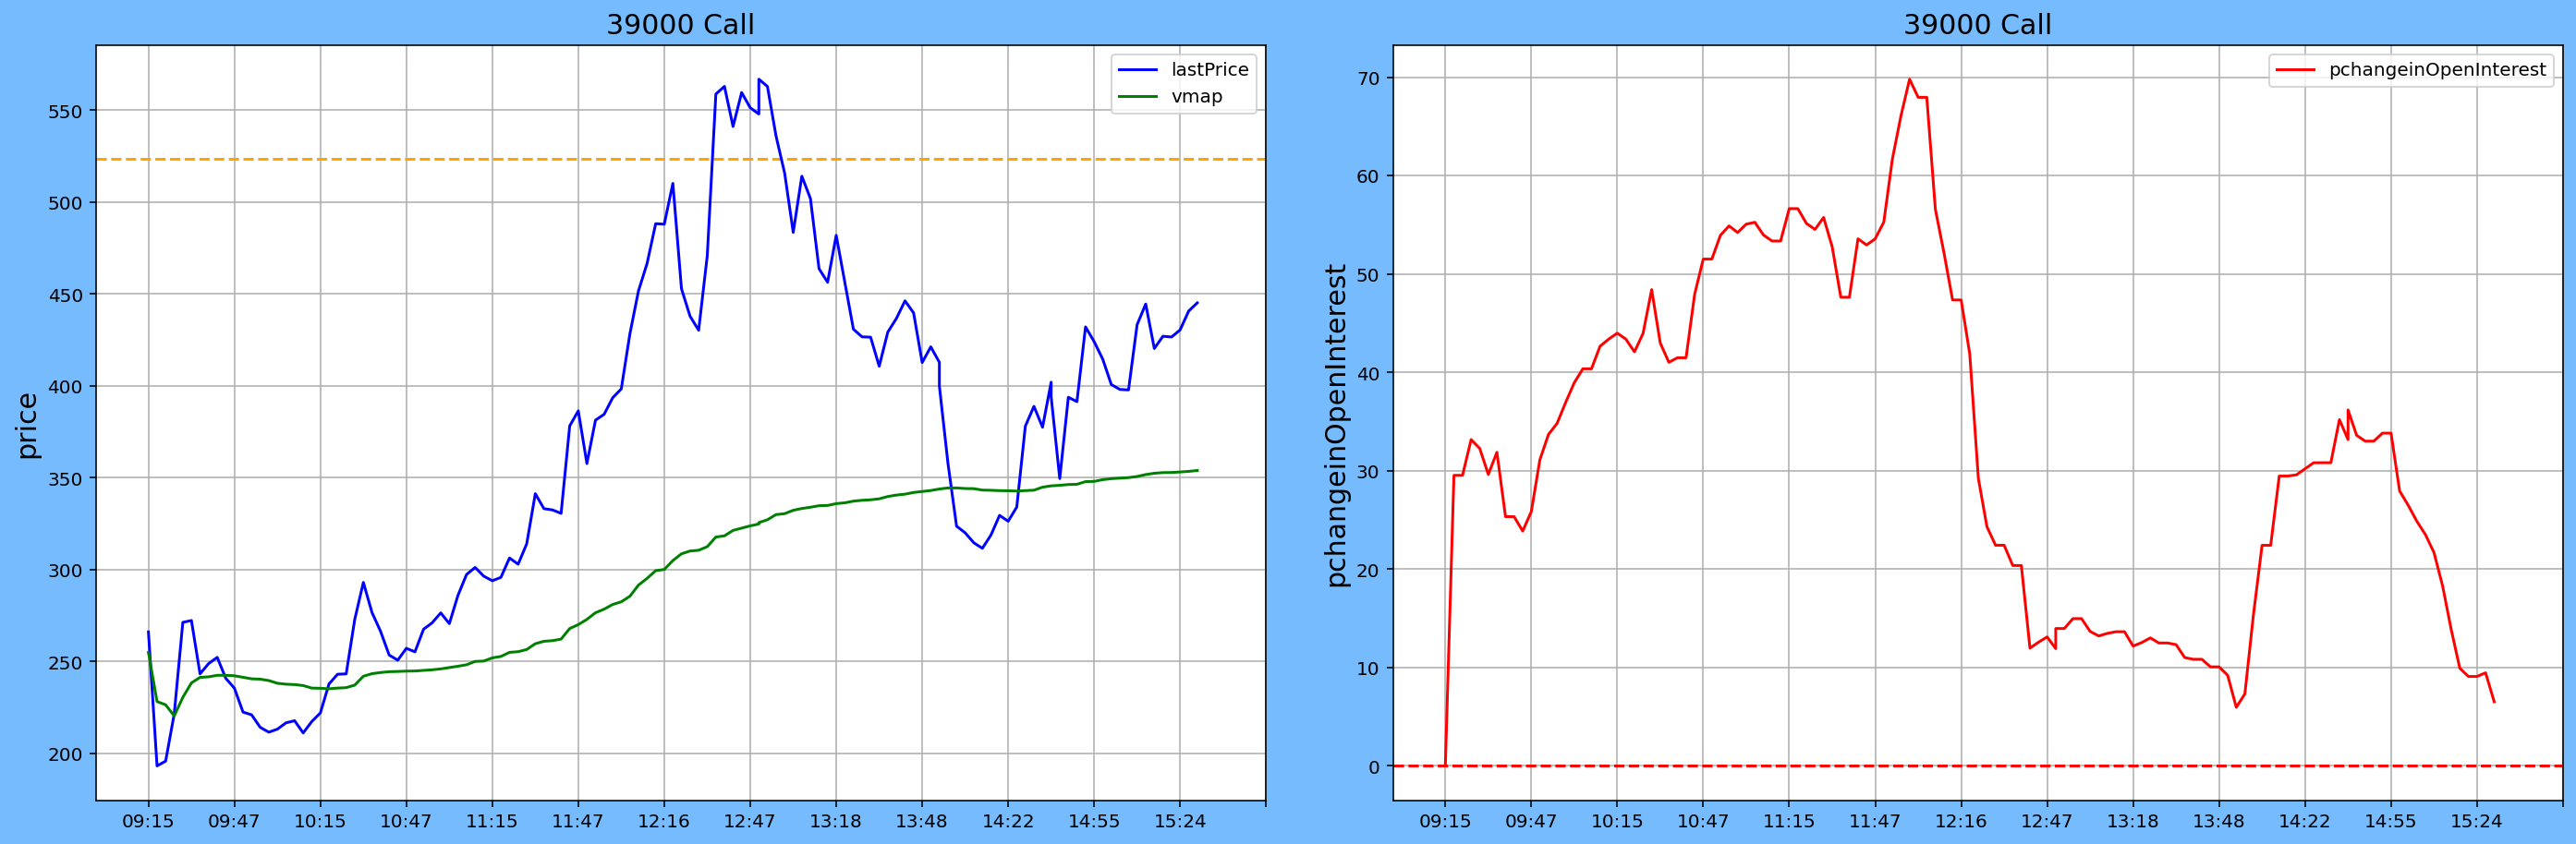

In [6]:
def get_option_plot_ltp(df,s,fut,ax):
    # ax3 = ax.twinx()
    # ax = plt.gca()
    # Then you can use set_facecolor:
    fig.set_facecolor('xkcd:sky blue')
    # ax.set_facecolor((1.0, 0.47, 0.42))  
    ax.axhline(df['prevClose'][0], color='orange', linestyle='--')
    ax.plot(df["timestamp"],df["lastPrice"],label='lastPrice',color='blue')
    ax.plot(df['timestamp'], df['vmap'],label='vmap',color='green') 
    ax.grid()
    ax.set_xticks(np.arange(0, len(df)+1, 10))# tick labels every (10*3=30)30 min
    for tick in ax.get_xticklabels():  # rotating labels using ax parameter
        tick.set_rotation(0)
    ax.set_title(f"{s} {fut}",size=15)
    ax.set_ylabel("price",size ='15')
    leg = ax.legend(loc="upper right")

def get_option_plot_oi(df,s,fut,ax):
  
    ax.plot(df["timestamp"],df["pchangeinOpenInterest"],label='pchangeinOpenInterest',color='red')   
    ax.axhline(0, color='red', linestyle='--')
    ax.grid()
    ax.set_xticks(np.arange(0, len(df)+1, 10))# tick labels every (10*3=30)30 min
    for tick in ax.get_xticklabels():  # rotating labels using ax parameter
        tick.set_rotation(0)
    ax.set_title(f"{s} {fut}",size=15)
    ax.set_ylabel("pchangeinOpenInterest",size ='15')
    leg = ax.legend(loc="upper right")

df_plot = get_option_price_df(df_list[v],s,cover)
df_plot = df_plot.data
df_plot=df_plot.sort_values(by='timestamp')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,7))#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
get_option_plot_ltp(df_plot,s,df_plot["optionType"][0],ax1)
get_option_plot_oi(df_plot,s,df_plot["optionType"][0],ax2)


fig.tight_layout(pad=3)
plt.show()

In [7]:
# data=get_option_price_df(df_list[v],s,cover)
# data=data.data
# data = round(data,2)
# data = data.set_index("timestamp")
# data.index=pd.to_datetime(data.index)
# print("-"*162)
# print("Date:",today,"\t\t\t\t\t\t\t|",s,c," details |","\t\t\t\t\t\t\t\t",res,"min")
# print("-"*162)
# data.resample(res,offset='9h15min').last().sort_values(by='timestamp',ascending=False)

## Details

In [8]:
print("-"*162)
print("Date:",today,"\t\t\t\t\t\t\t\t|",s,c," details |")
print("-"*162)
get_option_price_df(df_list[v],s,cover)

------------------------------------------------------------------------------------------------------------------------------------------------------------------
Date: 10-Oct-2022 								| 39000 CE  details |
------------------------------------------------------------------------------------------------------------------------------------------------------------------


,timestamp,underlying,expiryDate,optionType,strikePrice,openPrice,highPrice,lowPrice,prevClose,lastPrice,pChange,vmap,openInterest,pchangeinOpenInterest,impliedVolatility,buildup
133,15:30,39093.10,13-Oct-2022,Call,39000,308.90,583.00,188.10,523.50,445.20,-14.96,353.93,17.11,6.52,26.52,SB
132,15:30,39093.10,13-Oct-2022,Call,39000,308.90,583.00,188.10,523.50,445.20,-14.96,353.93,17.11,6.52,26.52,SB
131,15:30,39093.10,13-Oct-2022,Call,39000,308.90,583.00,188.10,523.50,445.20,-14.96,353.93,17.11,6.52,26.52,SB
130,15:30,39093.10,13-Oct-2022,Call,39000,308.90,583.00,188.10,523.50,445.20,-14.96,353.93,17.11,6.52,26.52,SB
129,15:30,39093.10,13-Oct-2022,Call,39000,308.90,583.00,188.10,523.50,445.20,-14.96,353.93,17.11,6.52,26.52,SB
128,15:30,39116.35,13-Oct-2022,Call,39000,308.90,583.00,188.10,523.50,445.20,-14.96,353.93,17.11,6.52,26.52,SB
127,15:30,39116.35,13-Oct-2022,Call,39000,308.90,583.00,188.10,523.50,445.20,-14.96,353.93,17.11,6.52,26.52,SB
126,15:30,39116.35,13-Oct-2022,Call,39000,308.90,583.00,188.10,523.50,445.20,-14.96,353.93,17.11,6.52,26.52,SB
125,15:27,39089.10,13-Oct-2022,Call,39000,308.90,583.00,188.10,523.50,440.75,-15.81,353.45,17.59,9.46,25.05,SB
124,15:24,39087.85,13-Oct-2022,Call,39000,308.90,583.00,188.10,523.50,430.45,-17.77,353.11,17.53,9.09,25.05,SB
